In [26]:
import numpy as np
from scipy.linalg import expm, logm
import sys
import copy
import time
import cv2
import os
from PIL import Image

In [2]:
################ Pre-defined parameters and functions below (can change if needed) ################
PI = np.pi
# 20Hz
SPIN_RATE = 20  

# UR3 home location
home = [270*PI/180.0, -90*PI/180.0, 90*PI/180.0, -90*PI/180.0, -90*PI/180.0, 135*PI/180.0]  

# UR3 current position, using home position for initialization
current_position = copy.deepcopy(home)  

thetas = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

digital_in_0 = 0
analog_in_0 = 0.0

suction_on = True
suction_off = False

current_io_0 = False
current_position_set = False

In [211]:
from matplotlib.pyplot import imshow
from matplotlib.pyplot import cm
def find_keypoints(image):
    """Gets keypoints from the given image
    Parameters
    ----------
    image : np.ndarray
        The given image (before or after preprocessing)
    Returns
    -------
    keypoints
        a list of keypoints detected in image coordinates
    """
    img = image
    # print(img.shape[:1])
    # noise = np.random.randint(0, 50, image.shape, dtype=np.uint8)

    # img = cv2.add(image, noise)
    width,height,channels = img.shape
    # print(width,height)
    white_image = np.full((width, height, 3), 255, dtype=np.uint8)    # blr = cv2.GaussianBlur(img, (5, 5), 7)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    grsclimg = Image.fromarray(img)
    grsclimg.save("threshold_images/grsclimg.jpg")
    th3 = cv2.adaptiveThreshold(
        img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 8
    )
    # th3 = cv2.threshold(img,)
    # th3 = cv2.morphologyEx(th3, cv2.MORPH_OPEN, kernel)

    # Save threshold image
    threshold_img = Image.fromarray(th3)
    threshold_img.save("threshold_images/threshold.jpg")
    # threshold_img.show()

    edges = cv2.Canny(th3, 230, 255)
    # Save edges image
    edges_img = Image.fromarray(edges)
    edges_img.save("threshold_images/edges.jpg")
    # edges_img.show()

    contours, hierarchy = cv2.findContours(
        edges, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE
    )
    print( len(hierarchy))
    contourimg = cv2.drawContours(white_image, contours, -1, (0, 0,0), 3)
    contour_img = Image.fromarray(contourimg)
    contour_img.save("threshold_images/contour.jpg")
    imshow(contourimg,cmap=cm.gray)
    keypoints = []
    return keypoints


# Create directory if it doesn't exist
if not os.path.exists("threshold_images"):
    os.makedirs("threshold_images")

In [212]:
def IMG2W(row, col, image):
    """Transform image coordinates to world coordinates

    Parameters
    ----------
    row : int
        Pixel row position
    col : int
        Pixel column position
    image : np.ndarray
        The given image (before or after preprocessing)

    Returns
    -------
    x : float
        x position in the world frame
    y : float
        y position in the world frame
    """
    x, y = 0.0, 0.0
    return x, y

In [213]:
def draw_image(world_keypoints):
    """Draw the image based on detecte keypoints in world coordinates

    Parameters
    ----------
    world_keypoints:
        a list of keypoints detected in world coordinates
    """
    pass


"""
Program run from here
"""

'\nProgram run from here\n'

In [214]:
turkey = cv2.imread("images/turkey.png")
zigzag = cv2.imread("images/zigzag.jpg")
status = cv2.imread("images/status.png")


1
1
1


[]

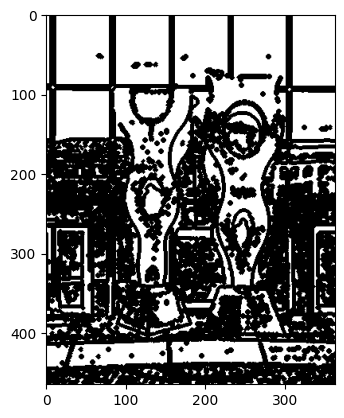

In [215]:
find_keypoints(zigzag)
find_keypoints(turkey)
find_keypoints(status)